<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

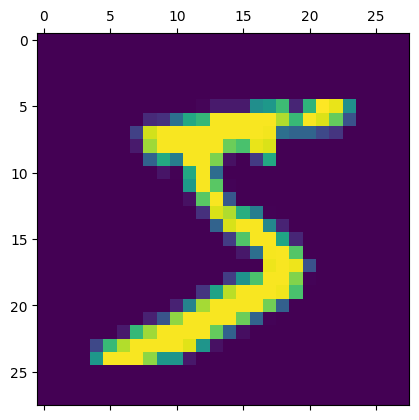

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

C:\Users\ntuse\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8808 - loss: 0.4408
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9618 - loss: 0.1312
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9851 - loss: 0.0497


In [12]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[-0.03000521, -0.03185764, -0.02142969, ...,  0.06461383,
          0.02589029,  0.04066636],
        [ 0.01903388,  0.07176474,  0.05341786, ...,  0.0177128 ,
          0.00419009,  0.01310041],
        [-0.0414422 ,  0.02306009, -0.0382714 , ..., -0.08063696,
         -0.02487746, -0.05189759],
        ...,
        [ 0.06163405, -0.00181413,  0.06453578, ...,  0.0802097 ,
          0.07397145, -0.05477152],
        [-0.00632792, -0.07263331,  0.05138971, ...,  0.06514892,
          0.03279308, -0.06514699],
        [-0.02482475,  0.03530934,  0.03187069, ..., -0.0541546 ,
          0.0018838 , -0.04756764]], dtype=float32),
 array([ 0.04876292,  0.09011409,  0.08861035,  0.09902102,  0.00236145,
        -0.03622661, -0.0075852 , -0.08866617, -0.02829002,  0.07432055,
         0.08370813,  0.05230539, -0.04785733,  0.0800483 ,  0.01619805,
        -0.11002418, -0.02643774, -0.02100059,  0.05171979,  0.08686493,
         0.12437584,  0.00057126,  0.06971034,  0.11670223,  0.160